# import packages and modules

In [18]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")



In [20]:
# Import data into dataframe

df = pd.read_csv('data/StudentsPerformance.csv')

In [21]:
# show the top 10 record

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [22]:
# printing out the unique values in each of the columns

print("Categories under 'Gender' Variable:        ",end="")
print(df['gender'].unique())

print("Categories under 'Parental Level Eduation' Variable:        ",end="")
print(df['parental level of education'].unique())

print("Categories under 'race_ethnicity' Variable:        ",end="")
print(df['race/ethnicity'].unique())

print("Categories under 'lunch' Variable:        ",end="")
print(df['lunch'].unique())

print("Categories under 'test_prep_course' Variable:        ",end="")
print(df['test preparation course'].unique())

Categories under 'Gender' Variable:        ['female' 'male']
Categories under 'Parental Level Eduation' Variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories under 'race_ethnicity' Variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
Categories under 'lunch' Variable:        ['standard' 'free/reduced']
Categories under 'test_prep_course' Variable:        ['none' 'completed']


In [23]:
# Preparing the X and Y variable
X = df.drop(['math score'], axis=1) #independent variables
Y = df['math score']

In [24]:
# creating column with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [ ("Onehotencoder",cat_transformer,cat_features),
     ('Standardscaler', numeric_transformer, num_features)])

 

In [25]:
X = preprocessor.fit_transform(X)


In [26]:
X.shape

(1000, 19)

# Splitting into train test split


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 19)
(200, 19)


# Creating a Evaluation fucntion to test all the models on test and training data

In [31]:
def evaluated_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse=mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [35]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []


for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train, Y_train)  # training the model

    #predictions
 # predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    #evaluate train and test dataset

    model_train_mae , model_train_rmse ,model_train_r2 = evaluated_model(Y_train,y_train_pred)
    model_test_mae , model_test_rmse ,model_test_r2 = evaluated_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Data set")
    print("-- Root Mean Squared error:{:.4f}".format(model_train_rmse))
    print("--  Mean Absolute  error:{:.4f}".format(model_train_mae))
    print("--  R2_score:{:.4f}".format(model_train_r2))

    print("--------------------------------------")


    
    print("Model Performance for Testing Data set")
    print("-- Root Mean Squared error:{:.4f}".format(model_test_rmse))
    print("--  Mean Absolute  error:{:.4f}".format(model_test_mae))
    print("--  R2_score:{:.4f}".format(model_test_r2))

    
    r2_list.append(model_test_r2)


    print('='*40)
    print("\n")





LinearRegression
Model Performance for Training Data set
-- Root Mean Squared error:5.3243
--  Mean Absolute  error:4.2671
--  R2_score:0.8743
--------------------------------------
Model Performance for Testing Data set
-- Root Mean Squared error:5.3960
--  Mean Absolute  error:4.2158
--  R2_score:0.8803


Lasso
Model Performance for Training Data set
-- Root Mean Squared error:6.5938
--  Mean Absolute  error:5.2063
--  R2_score:0.8071
--------------------------------------
Model Performance for Testing Data set
-- Root Mean Squared error:6.5197
--  Mean Absolute  error:5.1579
--  R2_score:0.8253


Ridge
Model Performance for Training Data set
-- Root Mean Squared error:5.3233
--  Mean Absolute  error:4.2650
--  R2_score:0.8743
--------------------------------------
Model Performance for Testing Data set
-- Root Mean Squared error:5.3904
--  Mean Absolute  error:4.2111
--  R2_score:0.8806


KNeighborsRegressor
Model Performance for Training Data set
-- Root Mean Squared error:5.7077
-

# Results

In [36]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model_name","R2_score"]).sort_values(by=['R2_score'],ascending=False)

,Model_name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.880345
8,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.848829
7,AdaBoostRegressor,0.846419
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.727417


In [37]:
# We are planning to proceed with linear Regression as all

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train ,Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


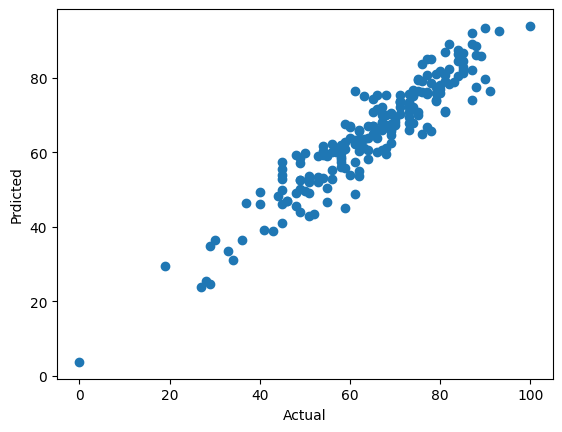

In [39]:
# plot Y_pred and y_test

plt.scatter(Y_test,Y_pred);
plt.xlabel("Actual");
plt.ylabel("Prdicted");

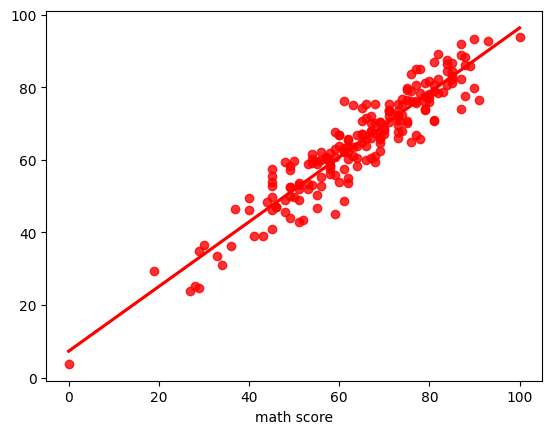

In [40]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red');

In [42]:
# Differnce between Actual and Predicted Values:
pred_df = pd.DataFrame({'Actual Value':Y_test,'Predicted_value':y_test_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted_value,Difference
521,91,74.709499,14.492188
737,53,54.706876,-5.953125
740,80,76.842097,3.039062
660,74,76.580288,-2.757812
411,84,87.297491,-3.539062
...,...,...,...
408,52,47.095579,8.453125
332,62,58.745708,-0.031250
208,74,69.989700,6.023438
613,65,68.313052,-2.132812
